## PLN - Exercício

### Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

%matplotlib inline

### Leitura dos dados

In [2]:
caminho = '/Users/user/Documents/Pessoal/Refactored_Py_DS_ML_Bootcamp-master/20-Natural-Language-Processing/yelp.csv'
df = pd.read_csv(caminho)

### Descrição dos dados

In [3]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
df.select_dtypes('object').describe()

,business_id,date,review_id,text,type,user_id
count,10000,10000,10000,10000,10000,10000
unique,4174,1995,10000,9998,1,6403
top,JokKtdXU7zXHcr20Lrk29A,2011-03-28,fWKvX83p0-ka4JS3dc6E5A,Great service,review,fczQCSmaWF78toLEmb0Zsw
freq,37,21,1,2,10000,38


### Adição de nova coluna - tamanho do texto

In [9]:
df['text_length'] = df['text'].apply(len)

### Exploração dos dados

/opt/homebrew/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


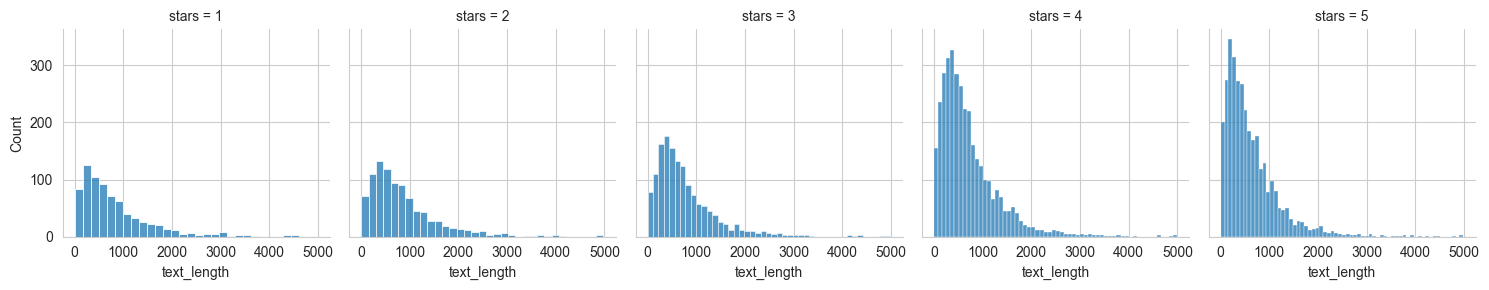

In [10]:
p = sns.FacetGrid(df, col='stars')
p.map_dataframe(sns.histplot, x='text_length')

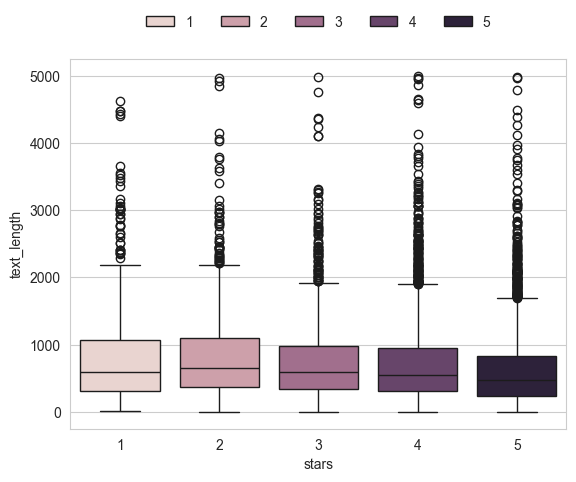

In [32]:
ax = sns.boxplot(df, x='stars', y='text_length', hue='stars')
sns.move_legend(ax, 'center',bbox_to_anchor=(.5, 1.1), ncol=5, title=None, frameon=False,)

<Axes: xlabel='stars', ylabel='count'>

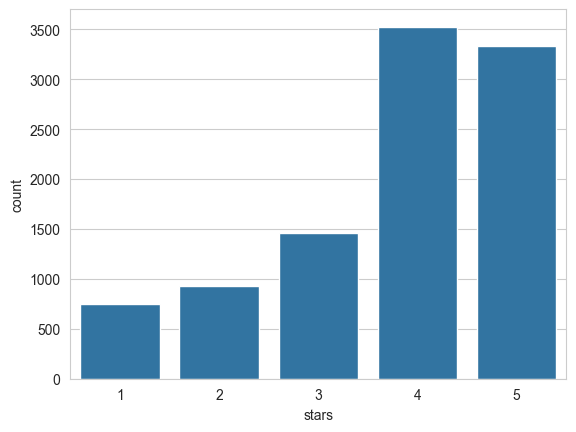

In [33]:
sns.countplot(df, x='stars')

In [37]:
df_groupby_stars = df.select_dtypes(exclude='object').groupby('stars').mean()

In [38]:
print(df_groupby_stars)

           cool    useful     funny  text_length
stars                                           
1      0.576769  1.604806  1.056075   826.515354
2      0.719525  1.563107  0.875944   842.256742
3      0.788501  1.306639  0.694730   758.498289
4      0.954623  1.395916  0.670448   712.923142
5      0.944261  1.381780  0.608631   624.999101


In [39]:
df_groupby_stars.corr()

,cool,useful,funny,text_length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text_length,-0.857664,0.699881,0.843461,1.000000


<Axes: >

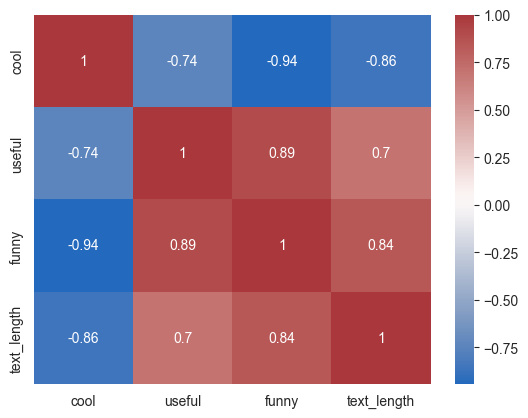

In [44]:
sns.heatmap(df_groupby_stars.corr(), annot=True, cmap='vlag')

### Tarefa de Classificação

In [50]:
yelp_class = df[(df['stars'] == 1) | (df['stars'] == 5)].copy()

In [54]:
X = yelp_class['text']
y = yelp_class['stars']

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
X = CountVectorizer().fit_transform(X)

In [73]:
print('Dimensão de X')
print('  n. linhas:', X.shape[0])
print('  n. colunas:', X.shape[1])

Dimensão de X
  n. linhas: 4086
  n. colunas: 19183


### Separando os dados

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Treinando o modelo

In [59]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
multi_nb = MultinomialNB()

In [63]:
multi_nb.fit(X_train, y_train)

MultinomialNB()

### Avaliação do modelo

In [64]:
pred = multi_nb.predict(X_test)

In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [66]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[159  69]
 [ 22 976]]
              precision    recall  f1-score   support

           1       0.88      0.70      0.78       228
           5       0.93      0.98      0.96       998

    accuracy                           0.93      1226
   macro avg       0.91      0.84      0.87      1226
weighted avg       0.92      0.93      0.92      1226



### Utilizando Processamento de Texto

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [68]:
pipeline = Pipeline([
    ('vetorizacao', CountVectorizer()),
    ('transformacao', TfidfTransformer()),
    ('modelagem', MultinomialNB())
])

In [74]:
X = yelp_class['text']
y = yelp_class['stars']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [77]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vetorizacao', CountVectorizer()),
                ('transformacao', TfidfTransformer()),
                ('modelagem', MultinomialNB())])

### Avaliação do modelo

In [78]:
pred = pipeline.predict(X_test)

In [79]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[  0 228]
 [  0 998]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       228
           5       0.81      1.00      0.90       998

    accuracy                           0.81      1226
   macro avg       0.41      0.50      0.45      1226
weighted avg       0.66      0.81      0.73      1226



/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Testando outras abordagens